<a href="https://colab.research.google.com/github/prakhar-chaurasiya/ml/blob/main/makemore_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nn-zero-to-hero](https://github.com/karpathy/nn-zero-to-hero)

[makemore](https://github.com/karpathy/makemore)

# [Building makemore Part 2: MLP](https://www.youtube.com/watch?v=TCH_1BHY58I&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3&ab_channel=AndrejKarpathy)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [2]:
f = requests.get('https://raw.githubusercontent.com/karpathy/makemore/master/names.txt')
words = f.text.splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [53]:
# build the dataest

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)

In [54]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C = torch.randn((27, 2))

In [8]:
C[5]

tensor([-0.1639,  1.7434])

In [12]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.1639,  1.7434])

In [14]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [15]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [24]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [25]:
h

tensor([[-0.9877,  0.9474,  0.7792,  ..., -0.9879, -0.9978, -0.7970],
        [-0.9106,  0.9934, -0.8383,  ..., -0.0140, -0.9746,  0.2712],
        [ 0.9983,  0.8015,  0.5389,  ..., -0.6573, -0.7568,  0.9734],
        ...,
        [ 0.9990, -0.9244, -0.1606,  ...,  0.9988,  0.4728, -0.9782],
        [ 0.9837,  0.2165, -0.7038,  ...,  0.5092, -0.7775, -0.8358],
        [ 0.9482, -0.4200,  0.5355,  ...,  0.9770,  0.7779, -0.9834]])

In [26]:
h.shape

torch.Size([32, 100])

In [28]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [29]:
logits = h @ W2 + b2

In [30]:
logits.shape

torch.Size([32, 27])

In [32]:
counts = logits.exp()

In [33]:
prob = counts / counts.sum(1, keepdims=True)

In [34]:
prob.shape

torch.Size([32, 27])

In [40]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.0769)

combine into one

In [55]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [82]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [83]:
sum(p.nelement() for p in parameters)

3481

In [84]:
for p in parameters:
  p.requires_grad = True

In [85]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [86]:
lri = []
lossi = []

for i in range(1000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # 32, 3, 2
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad
  
  # track stats
  lri.append(lre[i])
  lossi.append(loss.item())
# print(loss.item())

18.50948715209961
20.489526748657227
19.914875030517578
18.097421646118164
19.285673141479492
21.004301071166992
16.10133934020996
19.808273315429688
17.54448127746582
19.382396697998047
19.795686721801758
17.586523056030273
19.978437423706055
18.77669334411621
19.88577651977539
19.771162033081055
23.435474395751953
17.833608627319336
18.44638442993164
17.903345108032227
19.710155487060547
18.664337158203125
17.61602020263672
17.488977432250977
17.000886917114258
19.384157180786133
16.881574630737305
17.691659927368164
21.07852554321289
16.506839752197266
17.520355224609375
19.7706241607666
19.716779708862305
19.255733489990234
18.63093376159668
18.75099754333496
19.671693801879883
15.379770278930664
18.331892013549805
18.7362060546875
16.40839195251465
18.143367767333984
19.151103973388672
17.052431106567383
18.763704299926758
20.126367568969727
19.93238067626953
18.233421325683594
16.37158203125
18.70747184753418
20.64361000061035
15.588601112365723
17.091434478759766
19.116991043090

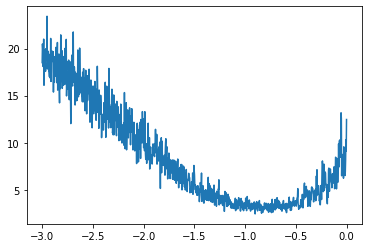

In [87]:
plt.plot(lri, lossi)

In [18]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[-1.8741, -0.3130, -1.8741, -0.3130, -1.8741, -0.3130],
        [-1.8741, -0.3130, -1.8741, -0.3130, -0.1639,  1.7434],
        [-1.8741, -0.3130, -0.1639,  1.7434, -0.9669,  1.0882],
        [-0.1639,  1.7434, -0.9669,  1.0882, -0.9669,  1.0882],
        [-0.9669,  1.0882, -0.9669,  1.0882,  0.9298, -0.4632],
        [-1.8741, -0.3130, -1.8741, -0.3130, -1.8741, -0.3130],
        [-1.8741, -0.3130, -1.8741, -0.3130,  0.7481,  0.4909],
        [-1.8741, -0.3130,  0.7481,  0.4909, -1.3582, -1.1562],
        [ 0.7481,  0.4909, -1.3582, -1.1562,  0.1171,  0.4729],
        [-1.3582, -1.1562,  0.1171,  0.4729,  0.4286,  0.1881],
        [ 0.1171,  0.4729,  0.4286,  0.1881,  0.1171,  0.4729],
        [ 0.4286,  0.1881,  0.1171,  0.4729,  0.9298, -0.4632],
        [-1.8741, -0.3130, -1.8741, -0.3130, -1.8741, -0.3130],
        [-1.8741, -0.3130, -1.8741, -0.3130,  0.9298, -0.4632],
        [-1.8741, -0.3130,  0.9298, -0.4632,  0.4286,  0.1881],
        [ 0.9298, -0.4632,  0.4286,  0.1

In [ ]:
emb.storage()